In [5]:
import numpy as np
import sys
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import interferometer as itf
sys.path.append('../') # Add parent directory to the system path
from boson_sampling_probabilities import output_probability
from simulation import run_interferom_simulation, dist_to_state

from numeric_truncated_unitaries import numeric_truncated_unitary
from direct_decomposition import compile_unitary, knit_qiskit_circuits, random_unitary, direct_decomposition
from random import random

In [50]:
def bs_matrix(BS):
    theta = BS.theta
    phi = BS.phi
    return np.array([[np.exp(1j *phi) * np.cos(theta),  -np.sin(theta)], 
                      [np.exp(1j * phi) * np.sin(theta), np.cos(theta)]])

def is_unitary(m):
    return np.allclose(np.eye(m.shape[0]), np.conjugate(np.transpose(m)) @ m)

[
 Beam splitter between modes 1 and 2: 
 Theta angle: 0.08 
 Phase: 0.00, 
 Beam splitter between modes 1 and 2: 
 Theta angle: 0.54 
 Phase: 0.00]


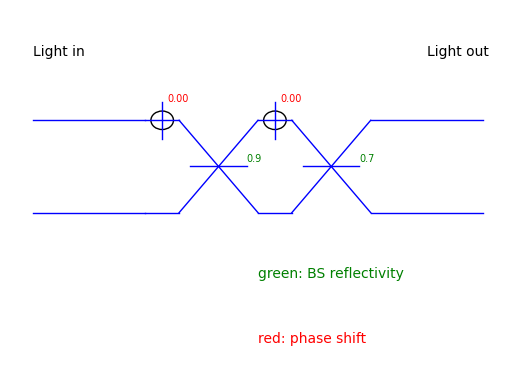

In [42]:
I = itf.Interferometer()

theta_1 = np.pi/2 * random()
phi_1 = 0
theta_2 = np.pi/2 * random()
phi_2 = 0

BS1 = itf.Beamsplitter(1, 2, theta=theta_1, phi=phi_1)
BS2 = itf.Beamsplitter(1, 2, theta=theta_2, phi=phi_2)

I.add_BS(BS1)
I.add_BS(BS2)

print(I.BS_list)
I.draw()

In [52]:
R1 = bs_matrix(BS1)
R2 = bs_matrix(BS2)
R = R2 @ R1

numpy.ndarray

In [56]:
initial_dist = [1,0]
possible_dists = [[1,0], [0,1]] # Every configuration of 3 photons in two modes

analytic_probs = dict()
for dist in possible_dists:
    prob = output_probability(dist, initial_dist, R)
    state = dist_to_state(dist)
    analytic_probs[state] = prob

print(analytic_probs)

{'10': 0.6617673804065861, '01': 0.338232619593414}


In [57]:
num_shots = 1e5
num_photons = 1

R1_circ = direct_decomposition(R1, num_photons)
R2_circ = direct_decomposition(R2, num_photons)
combined_circ = R1_circ.compose(R2_circ)

simcirc = R1_circ

num_qubits = R1_circ.num_qubits

initial_state = dist_to_state(initial_dist)
circuit = QuantumCircuit(num_qubits)
circuit.initialize(initial_state)

circuit.compose(simcirc, qubits=list(range(num_qubits)), inplace=True)
circuit.measure_all()

simulator = AerSimulator()
circuit = transpile(circuit, simulator) # TODO
result = simulator.run(circuit, shots=num_shots).result()
counts = result.get_counts(circuit)

# Convert counts to probabilities
for key in counts.keys():
    counts[key] = counts[key] / num_shots

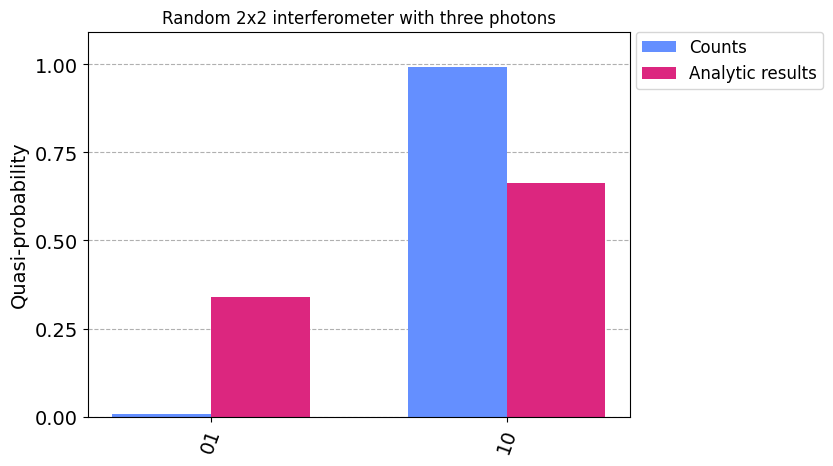

In [58]:
legend = ['Counts', 'Analytic results']
plot_histogram([counts, analytic_probs], legend=legend, 
               title='Random 2x2 interferometer with three photons', 
               bar_labels=False)

In [ ]:
I = itf.Interferometer()

theta_1 = np.pi/2 * random()
phi_1 = 0
theta_2 = np.pi/2 * random()
phi_2 = 0

BS1 = itf.Beamsplitter(1, 2, theta=theta_1, phi=phi_1)
BS2 = itf.Beamsplitter(1, 2, theta=theta_2, phi=phi_2)

I.add_BS(BS1)
I.add_BS(BS2)

print(I.BS_list)
I.draw()